Installing Scikit-Learn, TensorFlow, and Keras for Machine Learning

In [ ]:
!pip install scikeras
!pip install tensorflow==2.15.0
!pip install keras==2.15.0

IMPORTING LIBRARIES

In [ ]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from google.colab import drive

import pandas_datareader as pdr


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


LOADING DATASET

In [ ]:
main2df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LTC-USD.csv')

EXPLORATORY DATA ANALYSIS

In [ ]:
main2df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3354 entries, 0 to 3353
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3354 non-null   object 
 1   Open       3354 non-null   float64
 2   High       3354 non-null   float64
 3   Low        3354 non-null   float64
 4   Close      3354 non-null   float64
 5   Adj Close  3354 non-null   float64
 6   Volume     3354 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 183.5+ KB


In [ ]:
main2df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3354.000000,3354.000000,3354.000000,3354.000000,3354.000000,3.354000e+03
mean,68.429364,70.978115,65.660522,68.431468,68.431468,1.392403e+09
std,64.428415,67.599940,60.918807,64.385499,64.385499,2.118652e+09
min,1.153240,1.344810,1.113740,1.157010,1.157010,4.817140e+05
25%,4.238220,4.419017,4.112972,4.234197,4.234197,7.933430e+06
50%,56.691891,58.290132,54.963587,56.713549,56.713549,4.694070e+08
75%,93.656786,95.628269,90.904459,93.658074,93.658074,2.122472e+09
max,387.869171,412.960144,345.298828,386.450775,386.450775,1.799426e+10


In [ ]:
sd=main2df.iloc[0][0]
ed=main2df.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2014-09-17
Ending Date 2023-11-22


In [ ]:
main2df['Date'] = pd.to_datetime(main2df['Date'], format='%Y-%m-%d')

y_overall = main2df.loc[(main2df['Date'] >= '2014-09-17')
                     & (main2df['Date'] <= '2023-11-22')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2014-09-17,5.085890,5.170770,4.965950,5.058550
1,2014-09-18,5.065430,5.065430,4.579960,4.685230
2,2014-09-19,4.687290,4.755820,4.254350,4.327770
3,2014-09-20,4.329200,4.616080,4.202190,4.286440
4,2014-09-21,4.263070,4.300130,4.154990,4.245920
...,...,...,...,...,...
3349,2023-11-18,70.191620,70.276321,67.996239,69.893806
3350,2023-11-19,69.895370,70.669556,68.821861,70.640312
3351,2023-11-20,70.639320,70.959778,69.200745,69.517738
3352,2023-11-21,69.519119,71.643837,65.864296,66.457382


In [ ]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,74.793896,74.576650
February,78.357207,78.681024
March,74.993692,74.808016
April,79.954716,80.357330
May,81.948387,81.609722
June,68.400906,68.170589
July,62.979730,62.920140
August,62.224027,62.110219
September,56.974499,56.780050


In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'],
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
# Lets First Take all the Close Price
close2df = main2df[['Date','Close']]
print("Shape of close dataframe:", close2df.shape)

Shape of close dataframe: (3354, 2)


In [ ]:
fig = px.line(close2df, x=close2df.Date, y=close2df.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Litecoin close price 2014-2023', plot_bgcolor='white',
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
close2df = close2df[close2df['Date'] > '2021-02-19']
close_stock = close2df.copy()
print("Total data for prediction: ",close2df.shape[0])

Total data for prediction:  1006


In [ ]:
fig = px.line(close2df, x=close2df.Date, y=close2df.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Litecoin close price',
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

SCALING DATA

In [ ]:
del close2df['Date']
scaler=MinMaxScaler(feature_range=(0,1))
close2df=scaler.fit_transform(np.array(close2df).reshape(-1,1))
print(close2df.shape)

(1006, 1)


PREPARING TRAINING AND TESTING DATA

In [ ]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(close2df)*0.60)
test_size=len(close2df)-training_size
train_data,test_data=close2df[0:training_size,:],close2df[training_size:len(close2df),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (603, 1)
test_data:  (403, 1)


In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (587, 15)
y_train:  (587,)
X_test:  (387, 15)
y_test (387,)


In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (587, 15, 1)
X_test:  (387, 15, 1)


LSTM MODEL: USING FUNCTIONAL API |
GRID SEARCH CROSS VALIDATION |
OPTIMIZATION OF MODEL

In [ ]:


def create_model(optimizer='adam'):
    inputs = Input(shape=(None, 1))
    x = LSTM(10, activation='relu')(inputs)

    # Five hidden layers
    for _ in range(5):
        x = Dense(16, activation='relu')(x)

    output = Dense(1)(x)
    model = Model(inputs=inputs, outputs=output)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define the Keras model instance
keras_model = KerasRegressor(build_fn=create_model, verbose=1)

# Define the parameters grid to search through
param_grid = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'epochs': [100, 150, 200],
    'batch_size': [32, 64, 128],
}

# Perform GridSearchCV
grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid.fit(X_train, y_train)

# Get the best parameters
best_params = grid_result.best_params_
print("Best Parameters:", best_params)



/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
13/13 [==============================] - 3s 8ms/step - loss: 0.0539
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0334
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0213
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0187
Epoch 5/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0149
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0097
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0040
Epoch 8/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 9/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 10/100
13/13 [==============================] - 0s 8ms/step - loss: 9.4738e-04
Epoch 11/100
13/13 [==============================] - 0s 7ms/step - loss: 9.2714e-04
Epoch 12/100
13/13 [==============================] - 0s 8ms/step - loss: 8.8232e-04
Epoch 13/100
13/13 [=====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
13/13 [==============================] - 6s 20ms/step - loss: 0.0825
Epoch 2/100
13/13 [==============================] - 0s 16ms/step - loss: 0.0351
Epoch 3/100
13/13 [==============================] - 0s 24ms/step - loss: 0.0238
Epoch 4/100
13/13 [==============================] - 0s 28ms/step - loss: 0.0145
Epoch 5/100
13/13 [==============================] - 0s 16ms/step - loss: 0.0067
Epoch 6/100
13/13 [==============================] - 0s 21ms/step - loss: 0.0041
Epoch 7/100
13/13 [==============================] - 0s 21ms/step - loss: 0.0035
Epoch 8/100
13/13 [==============================] - 0s 22ms/step - loss: 0.0034
Epoch 9/100
13/13 [==============================] - 0s 26ms/step - loss: 0.0031
Epoch 10/100
13/13 [==============================] - 0s 23ms/step - loss: 0.0031
Epoch 11/100
13/13 [==============================] - 0s 23ms/step - loss: 0.0029
Epoch 12/100
13/13 [==============================] - 0s 24ms/step - loss: 0.0028
Epoch 13/100
13/13 [=====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
13/13 [==============================] - 3s 14ms/step - loss: 0.1421
Epoch 2/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0834
Epoch 3/100
13/13 [==============================] - 0s 13ms/step - loss: 0.0275
Epoch 4/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0128
Epoch 5/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0110
Epoch 6/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0089
Epoch 7/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0071
Epoch 8/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0055
Epoch 9/100
13/13 [==============================] - 0s 9ms/step - loss: 0.0039
Epoch 10/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0033
Epoch 11/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0031
Epoch 12/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 13/100
13/13 [=========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
13/13 [==============================] - 3s 8ms/step - loss: 0.0374
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0140
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0108
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0054
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 9.7219e-04
Epoch 8/100
13/13 [==============================] - 0s 7ms/step - loss: 9.2915e-04
Epoch 9/100
13/13 [==============================] - 0s 7ms/step - loss: 8.8505e-04
Epoch 10/100
13/13 [==============================] - 0s 7ms/step - loss: 8.8054e-04
Epoch 11/100
13/13 [==============================] - 0s 8ms/step - loss: 8.0842e-04
Epoch 12/100
13/13 [==============================] - 0s 8ms/step - loss: 7.9817e-04
Epoch 13/100


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
13/13 [==============================] - 2s 7ms/step - loss: 0.1031
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0764
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0479
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0288
Epoch 5/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0194
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0099
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0062
Epoch 8/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0050
Epoch 9/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0038
Epoch 10/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0034
Epoch 11/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0032
Epoch 12/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0031
Epoch 13/100
13/13 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
13/13 [==============================] - 2s 7ms/step - loss: 0.1296
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0573
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0130
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0117
Epoch 5/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0088
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0076
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0063
Epoch 8/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0057
Epoch 9/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0054
Epoch 10/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 11/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0048
Epoch 12/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0047
Epoch 13/100
13/13 [=================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
13/13 [==============================] - 3s 7ms/step - loss: 0.0433
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0198
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0140
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0093
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0038
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 8/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 9/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 10/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 11/100
13/13 [==============================] - 0s 8ms/step - loss: 9.6056e-04
Epoch 12/100
13/13 [==============================] - 0s 8ms/step - loss: 9.5945e-04
Epoch 13/100
13/13 [=========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
13/13 [==============================] - 2s 8ms/step - loss: 0.0707
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0279
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0217
Epoch 4/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0095
Epoch 5/100
13/13 [==============================] - 0s 25ms/step - loss: 0.0034
Epoch 6/100
13/13 [==============================] - 0s 30ms/step - loss: 0.0033
Epoch 7/100
13/13 [==============================] - 0s 32ms/step - loss: 0.0029
Epoch 8/100
13/13 [==============================] - 0s 30ms/step - loss: 0.0027
Epoch 9/100
13/13 [==============================] - 0s 24ms/step - loss: 0.0026
Epoch 10/100
13/13 [==============================] - 0s 15ms/step - loss: 0.0026
Epoch 11/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0028
Epoch 12/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0026
Epoch 13/100
13/13 [========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
13/13 [==============================] - 2s 8ms/step - loss: 0.1570
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1164
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0729
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0301
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0165
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0145
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0122
Epoch 8/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0101
Epoch 9/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0073
Epoch 10/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0054
Epoch 11/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0043
Epoch 12/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0041
Epoch 13/100
13/13 [=================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
13/13 [==============================] - 3s 14ms/step - loss: 0.0618
Epoch 2/150
13/13 [==============================] - 0s 13ms/step - loss: 0.0543
Epoch 3/150
13/13 [==============================] - 0s 13ms/step - loss: 0.0469
Epoch 4/150
13/13 [==============================] - 0s 14ms/step - loss: 0.0400
Epoch 5/150
13/13 [==============================] - 0s 12ms/step - loss: 0.0335
Epoch 6/150
13/13 [==============================] - 0s 11ms/step - loss: 0.0268
Epoch 7/150
13/13 [==============================] - 0s 11ms/step - loss: 0.0192
Epoch 8/150
13/13 [==============================] - 0s 11ms/step - loss: 0.0110
Epoch 9/150
13/13 [==============================] - 0s 11ms/step - loss: 0.0033
Epoch 10/150
13/13 [==============================] - 0s 13ms/step - loss: 0.0025
Epoch 11/150
13/13 [==============================] - 0s 11ms/step - loss: 0.0018
Epoch 12/150
13/13 [==============================] - 0s 11ms/step - loss: 0.0014
Epoch 13/150
13/13 [=====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
13/13 [==============================] - 3s 7ms/step - loss: 0.0714
Epoch 2/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0254
Epoch 3/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0148
Epoch 4/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0061
Epoch 5/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0033
Epoch 6/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0032
Epoch 7/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 8/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 9/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0026
Epoch 10/150
13/13 [==============================] - 0s 9ms/step - loss: 0.0027
Epoch 11/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 12/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0023
Epoch 13/150
13/13 [=================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
13/13 [==============================] - 2s 7ms/step - loss: 0.1494
Epoch 2/150
13/13 [==============================] - 0s 7ms/step - loss: 0.1063
Epoch 3/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0574
Epoch 4/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0164
Epoch 5/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0146
Epoch 6/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0120
Epoch 7/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0105
Epoch 8/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0095
Epoch 9/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0087
Epoch 10/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0082
Epoch 11/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0076
Epoch 12/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0078
Epoch 13/150
13/13 [=================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
13/13 [==============================] - 2s 7ms/step - loss: 0.0580
Epoch 2/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0441
Epoch 3/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0287
Epoch 4/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0200
Epoch 5/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0168
Epoch 6/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0086
Epoch 7/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 8/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 9/150
13/13 [==============================] - 0s 7ms/step - loss: 8.5649e-04
Epoch 10/150
13/13 [==============================] - 0s 7ms/step - loss: 7.9665e-04
Epoch 11/150
13/13 [==============================] - 0s 7ms/step - loss: 7.3963e-04
Epoch 12/150
13/13 [==============================] - 0s 8ms/step - loss: 7.5366e-04
Epoch 13/150
13/13 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
13/13 [==============================] - 4s 14ms/step - loss: 0.0939
Epoch 2/150
13/13 [==============================] - 0s 14ms/step - loss: 0.0500
Epoch 3/150
13/13 [==============================] - 0s 13ms/step - loss: 0.0309
Epoch 4/150
13/13 [==============================] - 0s 12ms/step - loss: 0.0209
Epoch 5/150
13/13 [==============================] - 0s 12ms/step - loss: 0.0098
Epoch 6/150
13/13 [==============================] - 0s 12ms/step - loss: 0.0061
Epoch 7/150
13/13 [==============================] - 0s 13ms/step - loss: 0.0052
Epoch 8/150
13/13 [==============================] - 0s 12ms/step - loss: 0.0045
Epoch 9/150
13/13 [==============================] - 0s 14ms/step - loss: 0.0039
Epoch 10/150
13/13 [==============================] - 0s 13ms/step - loss: 0.0036
Epoch 11/150
13/13 [==============================] - 0s 12ms/step - loss: 0.0034
Epoch 12/150
13/13 [==============================] - 0s 12ms/step - loss: 0.0033
Epoch 13/150
13/13 [=====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
13/13 [==============================] - 2s 8ms/step - loss: 0.1557
Epoch 2/150
13/13 [==============================] - 0s 8ms/step - loss: 0.1210
Epoch 3/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0834
Epoch 4/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0455
Epoch 5/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0196
Epoch 6/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0166
Epoch 7/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0148
Epoch 8/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0128
Epoch 9/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0101
Epoch 10/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0081
Epoch 11/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0070
Epoch 12/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0060
Epoch 13/150
13/13 [=================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
13/13 [==============================] - 2s 8ms/step - loss: 0.0539
Epoch 2/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0343
Epoch 3/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0229
Epoch 4/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0200
Epoch 5/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0152
Epoch 6/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0080
Epoch 7/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0022
Epoch 8/150
13/13 [==============================] - 0s 11ms/step - loss: 0.0013
Epoch 9/150
13/13 [==============================] - 0s 12ms/step - loss: 0.0010
Epoch 10/150
13/13 [==============================] - 0s 11ms/step - loss: 9.0474e-04
Epoch 11/150
13/13 [==============================] - 0s 12ms/step - loss: 0.0010
Epoch 12/150
13/13 [==============================] - 0s 13ms/step - loss: 8.5691e-04
Epoch 13/150
13/13 [====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
13/13 [==============================] - 3s 14ms/step - loss: 0.1080
Epoch 2/150
13/13 [==============================] - 0s 11ms/step - loss: 0.0787
Epoch 3/150
13/13 [==============================] - 0s 13ms/step - loss: 0.0538
Epoch 4/150
13/13 [==============================] - 0s 12ms/step - loss: 0.0356
Epoch 5/150
13/13 [==============================] - 0s 12ms/step - loss: 0.0203
Epoch 6/150
13/13 [==============================] - 0s 12ms/step - loss: 0.0057
Epoch 7/150
13/13 [==============================] - 0s 12ms/step - loss: 0.0032
Epoch 8/150
13/13 [==============================] - 0s 12ms/step - loss: 0.0025
Epoch 9/150
13/13 [==============================] - 0s 11ms/step - loss: 0.0020
Epoch 10/150
13/13 [==============================] - 0s 13ms/step - loss: 0.0018
Epoch 11/150
13/13 [==============================] - 0s 13ms/step - loss: 0.0020
Epoch 12/150
13/13 [==============================] - 0s 11ms/step - loss: 0.0016
Epoch 13/150
13/13 [=====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
13/13 [==============================] - 3s 8ms/step - loss: 0.1394
Epoch 2/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0712
Epoch 3/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0215
Epoch 4/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0147
Epoch 5/150
13/13 [==============================] - 0s 10ms/step - loss: 0.0116
Epoch 6/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0096
Epoch 7/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0069
Epoch 8/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0046
Epoch 9/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0033
Epoch 10/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 11/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 12/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 13/150
13/13 [================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
13/13 [==============================] - 2s 7ms/step - loss: 0.0561
Epoch 2/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0405
Epoch 3/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0265
Epoch 4/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0167
Epoch 5/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0116
Epoch 6/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0058
Epoch 7/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 8/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 9/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 10/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 11/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 12/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 13/200
13/13 [=================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
13/13 [==============================] - 3s 13ms/step - loss: 0.1036
Epoch 2/200
13/13 [==============================] - 0s 12ms/step - loss: 0.0811
Epoch 3/200
13/13 [==============================] - 0s 13ms/step - loss: 0.0568
Epoch 4/200
13/13 [==============================] - 0s 11ms/step - loss: 0.0380
Epoch 5/200
13/13 [==============================] - 0s 11ms/step - loss: 0.0245
Epoch 6/200
13/13 [==============================] - 0s 12ms/step - loss: 0.0110
Epoch 7/200
13/13 [==============================] - 0s 11ms/step - loss: 0.0041
Epoch 8/200
13/13 [==============================] - 0s 11ms/step - loss: 0.0033
Epoch 9/200
13/13 [==============================] - 0s 13ms/step - loss: 0.0029
Epoch 10/200
13/13 [==============================] - 0s 11ms/step - loss: 0.0026
Epoch 11/200
13/13 [==============================] - 0s 12ms/step - loss: 0.0025
Epoch 12/200
13/13 [==============================] - 0s 11ms/step - loss: 0.0024
Epoch 13/200
13/13 [=====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
13/13 [==============================] - 2s 7ms/step - loss: 0.1510
Epoch 2/200
13/13 [==============================] - 0s 8ms/step - loss: 0.1058
Epoch 3/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0556
Epoch 4/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0162
Epoch 5/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0141
Epoch 6/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0109
Epoch 7/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0093
Epoch 8/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0084
Epoch 9/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0075
Epoch 10/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0070
Epoch 11/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0065
Epoch 12/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0060
Epoch 13/200
13/13 [=================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
13/13 [==============================] - 3s 11ms/step - loss: 0.0390
Epoch 2/200
13/13 [==============================] - 0s 12ms/step - loss: 0.0161
Epoch 3/200
13/13 [==============================] - 0s 12ms/step - loss: 0.0114
Epoch 4/200
13/13 [==============================] - 0s 11ms/step - loss: 0.0054
Epoch 5/200
13/13 [==============================] - 0s 12ms/step - loss: 0.0016
Epoch 6/200
13/13 [==============================] - 0s 12ms/step - loss: 8.6309e-04
Epoch 7/200
13/13 [==============================] - 0s 14ms/step - loss: 8.3250e-04
Epoch 8/200
13/13 [==============================] - 0s 11ms/step - loss: 7.6785e-04
Epoch 9/200
13/13 [==============================] - 0s 11ms/step - loss: 7.4408e-04
Epoch 10/200
13/13 [==============================] - 0s 11ms/step - loss: 6.9558e-04
Epoch 11/200
13/13 [==============================] - 0s 12ms/step - loss: 7.1934e-04
Epoch 12/200
13/13 [==============================] - 0s 11ms/step - loss: 6.7718e-

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
13/13 [==============================] - 3s 9ms/step - loss: 0.0819
Epoch 2/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0341
Epoch 3/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0249
Epoch 4/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0129
Epoch 5/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0042
Epoch 6/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0030
Epoch 7/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0031
Epoch 8/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 9/200
13/13 [==============================] - 0s 11ms/step - loss: 0.0027
Epoch 10/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0025
Epoch 11/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0024
Epoch 12/200
13/13 [==============================] - 0s 11ms/step - loss: 0.0025
Epoch 13/200
13/13 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
13/13 [==============================] - 3s 13ms/step - loss: 0.1588
Epoch 2/200
13/13 [==============================] - 0s 13ms/step - loss: 0.1342
Epoch 3/200
13/13 [==============================] - 0s 12ms/step - loss: 0.1049
Epoch 4/200
13/13 [==============================] - 0s 13ms/step - loss: 0.0671
Epoch 5/200
13/13 [==============================] - 0s 13ms/step - loss: 0.0270
Epoch 6/200
13/13 [==============================] - 0s 13ms/step - loss: 0.0146
Epoch 7/200
13/13 [==============================] - 0s 12ms/step - loss: 0.0127
Epoch 8/200
13/13 [==============================] - 0s 12ms/step - loss: 0.0110
Epoch 9/200
13/13 [==============================] - 0s 11ms/step - loss: 0.0095
Epoch 10/200
13/13 [==============================] - 0s 12ms/step - loss: 0.0085
Epoch 11/200
13/13 [==============================] - 0s 12ms/step - loss: 0.0075
Epoch 12/200
13/13 [==============================] - 0s 11ms/step - loss: 0.0064
Epoch 13/200
13/13 [=====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
13/13 [==============================] - 2s 8ms/step - loss: 0.0584
Epoch 2/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0423
Epoch 3/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0281
Epoch 4/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0231
Epoch 5/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0193
Epoch 6/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0127
Epoch 7/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0047
Epoch 8/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 9/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0010
Epoch 10/200
13/13 [==============================] - 0s 8ms/step - loss: 8.4385e-04
Epoch 11/200
13/13 [==============================] - 0s 8ms/step - loss: 7.8744e-04
Epoch 12/200
13/13 [==============================] - 0s 8ms/step - loss: 7.6667e-04
Epoch 13/200
13/13 [=====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
13/13 [==============================] - 3s 11ms/step - loss: 0.0956
Epoch 2/200
13/13 [==============================] - 0s 13ms/step - loss: 0.0538
Epoch 3/200
13/13 [==============================] - 0s 12ms/step - loss: 0.0276
Epoch 4/200
13/13 [==============================] - 0s 12ms/step - loss: 0.0147
Epoch 5/200
13/13 [==============================] - 0s 12ms/step - loss: 0.0052
Epoch 6/200
13/13 [==============================] - 0s 11ms/step - loss: 0.0037
Epoch 7/200
13/13 [==============================] - 0s 12ms/step - loss: 0.0032
Epoch 8/200
13/13 [==============================] - 0s 12ms/step - loss: 0.0035
Epoch 9/200
13/13 [==============================] - 0s 11ms/step - loss: 0.0030
Epoch 10/200
13/13 [==============================] - 0s 11ms/step - loss: 0.0027
Epoch 11/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 12/200
13/13 [==============================] - 0s 11ms/step - loss: 0.0026
Epoch 13/200
13/13 [=====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
13/13 [==============================] - 3s 8ms/step - loss: 0.1393
Epoch 2/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0827
Epoch 3/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0334
Epoch 4/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0173
Epoch 5/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0152
Epoch 6/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0134
Epoch 7/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0116
Epoch 8/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0094
Epoch 9/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0069
Epoch 10/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0052
Epoch 11/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0045
Epoch 12/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0041
Epoch 13/200
13/13 [================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
7/7 [==============================] - 2s 9ms/step - loss: 0.0604
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0477
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0348
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0251
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0188
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0160
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0127
Epoch 8/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 9/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0052
Epoch 10/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 11/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 12/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0012
Epoch 13/100
7/7 [==============================] - 0s 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
7/7 [==============================] - 3s 8ms/step - loss: 0.1206
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0864
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0623
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0407
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0257
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0181
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0115
Epoch 8/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0072
Epoch 9/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0064
Epoch 10/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 11/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0046
Epoch 12/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0043
Epoch 13/100
7/7 [==============================] - 0s 10

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
7/7 [==============================] - 3s 12ms/step - loss: 0.1578
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 0.1216
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0823
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0421
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0190
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0181
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0168
Epoch 8/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0135
Epoch 9/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0130
Epoch 10/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0112
Epoch 11/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0099
Epoch 12/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0084
Epoch 13/100
7/7 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
7/7 [==============================] - 2s 10ms/step - loss: 0.0602
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0441
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0317
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0229
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0184
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0149
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0119
Epoch 8/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0087
Epoch 9/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0052
Epoch 10/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0028
Epoch 11/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 12/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0014
Epoch 13/100
7/7 [==============================] - 0s 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
7/7 [==============================] - 2s 9ms/step - loss: 0.0814
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0433
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0243
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0194
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0136
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0077
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0038
Epoch 8/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0033
Epoch 9/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0030
Epoch 10/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0029
Epoch 11/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 12/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0026
Epoch 13/100
7/7 [==============================] - 0s 9m

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
7/7 [==============================] - 5s 13ms/step - loss: 0.1620
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 0.1396
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 0.1131
Epoch 4/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0836
Epoch 5/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0536
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0291
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0164
Epoch 8/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0163
Epoch 9/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0148
Epoch 10/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0141
Epoch 11/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0126
Epoch 12/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0119
Epoch 13/100
7/7 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
7/7 [==============================] - 2s 12ms/step - loss: 0.0650
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0562
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0496
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0414
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0336
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0267
Epoch 7/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0209
Epoch 8/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0160
Epoch 9/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0111
Epoch 10/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0062
Epoch 11/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0033
Epoch 12/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0018
Epoch 13/100
7/7 [==============================] -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
7/7 [==============================] - 3s 9ms/step - loss: 0.1058
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0868
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0677
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0506
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0398
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0359
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0327
Epoch 8/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0265
Epoch 9/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0197
Epoch 10/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0120
Epoch 11/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0054
Epoch 12/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0029
Epoch 13/100
7/7 [==============================] - 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
7/7 [==============================] - 3s 12ms/step - loss: 0.1406
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0979
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0562
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0236
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0145
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0169
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0133
Epoch 8/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0123
Epoch 9/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0117
Epoch 10/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0105
Epoch 11/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0092
Epoch 12/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0082
Epoch 13/100
7/7 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
7/7 [==============================] - 2s 10ms/step - loss: 0.0471
Epoch 2/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0259
Epoch 3/150
7/7 [==============================] - 0s 12ms/step - loss: 0.0139
Epoch 4/150
7/7 [==============================] - 0s 11ms/step - loss: 0.0119
Epoch 5/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 6/150
7/7 [==============================] - 0s 12ms/step - loss: 0.0063
Epoch 7/150
7/7 [==============================] - 0s 11ms/step - loss: 0.0034
Epoch 8/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 9/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0014
Epoch 10/150
7/7 [==============================] - 0s 11ms/step - loss: 0.0013
Epoch 11/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0012
Epoch 12/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 13/150
7/7 [==============================] -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
7/7 [==============================] - 2s 13ms/step - loss: 0.1083
Epoch 2/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0901
Epoch 3/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0717
Epoch 4/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0539
Epoch 5/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0398
Epoch 6/150
7/7 [==============================] - 0s 12ms/step - loss: 0.0315
Epoch 7/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0252
Epoch 8/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0188
Epoch 9/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 10/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0087
Epoch 11/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0070
Epoch 12/150
7/7 [==============================] - 0s 11ms/step - loss: 0.0061
Epoch 13/150
7/7 [==============================] - 0s 9

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
7/7 [==============================] - 2s 11ms/step - loss: 0.1667
Epoch 2/150
7/7 [==============================] - 0s 9ms/step - loss: 0.1523
Epoch 3/150
7/7 [==============================] - 0s 8ms/step - loss: 0.1382
Epoch 4/150
7/7 [==============================] - 0s 9ms/step - loss: 0.1224
Epoch 5/150
7/7 [==============================] - 0s 9ms/step - loss: 0.1050
Epoch 6/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0864
Epoch 7/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0664
Epoch 8/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0460
Epoch 9/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0267
Epoch 10/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0157
Epoch 11/150
7/7 [==============================] - 0s 11ms/step - loss: 0.0147
Epoch 12/150
7/7 [==============================] - 0s 11ms/step - loss: 0.0139
Epoch 13/150
7/7 [==============================] - 0s

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
7/7 [==============================] - 2s 9ms/step - loss: 0.0593
Epoch 2/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0473
Epoch 3/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0354
Epoch 4/150
7/7 [==============================] - 0s 11ms/step - loss: 0.0241
Epoch 5/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 6/150
7/7 [==============================] - 0s 12ms/step - loss: 0.0160
Epoch 7/150
7/7 [==============================] - 0s 12ms/step - loss: 0.0145
Epoch 8/150
7/7 [==============================] - 0s 11ms/step - loss: 0.0109
Epoch 9/150
7/7 [==============================] - 0s 12ms/step - loss: 0.0080
Epoch 10/150
7/7 [==============================] - 0s 11ms/step - loss: 0.0048
Epoch 11/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0031
Epoch 12/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0020
Epoch 13/150
7/7 [==============================] - 0s

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
7/7 [==============================] - 2s 8ms/step - loss: 0.1083
Epoch 2/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0950
Epoch 3/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0810
Epoch 4/150
7/7 [==============================] - 0s 12ms/step - loss: 0.0666
Epoch 5/150
7/7 [==============================] - 0s 11ms/step - loss: 0.0523
Epoch 6/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0401
Epoch 7/150
7/7 [==============================] - 0s 11ms/step - loss: 0.0323
Epoch 8/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0265
Epoch 9/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 10/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0111
Epoch 11/150
7/7 [==============================] - 0s 11ms/step - loss: 0.0067
Epoch 12/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0052
Epoch 13/150
7/7 [==============================] - 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
7/7 [==============================] - 2s 10ms/step - loss: 0.1738
Epoch 2/150
7/7 [==============================] - 0s 10ms/step - loss: 0.1449
Epoch 3/150
7/7 [==============================] - 0s 11ms/step - loss: 0.1274
Epoch 4/150
7/7 [==============================] - 0s 14ms/step - loss: 0.1077
Epoch 5/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0857
Epoch 6/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0629
Epoch 7/150
7/7 [==============================] - 0s 11ms/step - loss: 0.0395
Epoch 8/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0208
Epoch 9/150
7/7 [==============================] - 0s 11ms/step - loss: 0.0132
Epoch 10/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 11/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0117
Epoch 12/150
7/7 [==============================] - 0s 12ms/step - loss: 0.0111
Epoch 13/150
7/7 [==============================] - 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
7/7 [==============================] - 2s 8ms/step - loss: 0.0572
Epoch 2/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0423
Epoch 3/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0303
Epoch 4/150
7/7 [==============================] - 0s 11ms/step - loss: 0.0217
Epoch 5/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0176
Epoch 6/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0161
Epoch 7/150
7/7 [==============================] - 0s 11ms/step - loss: 0.0131
Epoch 8/150
7/7 [==============================] - 0s 11ms/step - loss: 0.0098
Epoch 9/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0065
Epoch 10/150
7/7 [==============================] - 0s 11ms/step - loss: 0.0038
Epoch 11/150
7/7 [==============================] - 0s 11ms/step - loss: 0.0024
Epoch 12/150
7/7 [==============================] - 0s 12ms/step - loss: 0.0018
Epoch 13/150
7/7 [==============================] - 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
7/7 [==============================] - 3s 12ms/step - loss: 0.1086
Epoch 2/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0940
Epoch 3/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0798
Epoch 4/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0653
Epoch 5/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0513
Epoch 6/150
7/7 [==============================] - 0s 11ms/step - loss: 0.0407
Epoch 7/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0352
Epoch 8/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0304
Epoch 9/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0231
Epoch 10/150
7/7 [==============================] - 0s 13ms/step - loss: 0.0137
Epoch 11/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0064
Epoch 12/150
7/7 [==============================] - 0s 11ms/step - loss: 0.0026
Epoch 13/150
7/7 [==============================] - 0s

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
7/7 [==============================] - 3s 10ms/step - loss: 0.1702
Epoch 2/150
7/7 [==============================] - 0s 10ms/step - loss: 0.1499
Epoch 3/150
7/7 [==============================] - 0s 11ms/step - loss: 0.1272
Epoch 4/150
7/7 [==============================] - 0s 14ms/step - loss: 0.1006
Epoch 5/150
7/7 [==============================] - 0s 12ms/step - loss: 0.0729
Epoch 6/150
7/7 [==============================] - 0s 12ms/step - loss: 0.0449
Epoch 7/150
7/7 [==============================] - 0s 13ms/step - loss: 0.0236
Epoch 8/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0159
Epoch 9/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0177
Epoch 10/150
7/7 [==============================] - 0s 12ms/step - loss: 0.0147
Epoch 11/150
7/7 [==============================] - 0s 11ms/step - loss: 0.0129
Epoch 12/150
7/7 [==============================] - 0s 11ms/step - loss: 0.0118
Epoch 13/150
7/7 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
7/7 [==============================] - 3s 15ms/step - loss: 0.0551
Epoch 2/200
7/7 [==============================] - 0s 15ms/step - loss: 0.0389
Epoch 3/200
7/7 [==============================] - 0s 14ms/step - loss: 0.0268
Epoch 4/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0204
Epoch 5/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0172
Epoch 6/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0144
Epoch 7/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0099
Epoch 8/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0053
Epoch 9/200
7/7 [==============================] - 0s 13ms/step - loss: 0.0023
Epoch 10/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0013
Epoch 11/200
7/7 [==============================] - 0s 13ms/step - loss: 0.0011
Epoch 12/200
7/7 [==============================] - 0s 13ms/step - loss: 9.5030e-04
Epoch 13/200
7/7 [===========================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
7/7 [==============================] - 2s 8ms/step - loss: 0.1147
Epoch 2/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0972
Epoch 3/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0823
Epoch 4/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0689
Epoch 5/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0564
Epoch 6/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0473
Epoch 7/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0434
Epoch 8/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0398
Epoch 9/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0341
Epoch 10/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0267
Epoch 11/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0183
Epoch 12/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0120
Epoch 13/200
7/7 [==============================] - 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
7/7 [==============================] - 2s 10ms/step - loss: 0.1560
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 0.1271
Epoch 3/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0972
Epoch 4/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0645
Epoch 5/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0349
Epoch 6/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0155
Epoch 7/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0152
Epoch 8/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0148
Epoch 9/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0120
Epoch 10/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0116
Epoch 11/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0106
Epoch 12/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0098
Epoch 13/200
7/7 [==============================] 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
7/7 [==============================] - 3s 10ms/step - loss: 0.0599
Epoch 2/200
7/7 [==============================] - 0s 14ms/step - loss: 0.0497
Epoch 3/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0393
Epoch 4/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0302
Epoch 5/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0233
Epoch 6/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0199
Epoch 7/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0178
Epoch 8/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0139
Epoch 9/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0087
Epoch 10/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0031
Epoch 11/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0013
Epoch 12/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0014
Epoch 13/200
7/7 [==============================] 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
7/7 [==============================] - 2s 9ms/step - loss: 0.1118
Epoch 2/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0948
Epoch 3/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0786
Epoch 4/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0645
Epoch 5/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0529
Epoch 6/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0438
Epoch 7/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0391
Epoch 8/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0343
Epoch 9/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0288
Epoch 10/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0224
Epoch 11/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0157
Epoch 12/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0086
Epoch 13/200
7/7 [==============================] - 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
7/7 [==============================] - 3s 8ms/step - loss: 0.1621
Epoch 2/200
7/7 [==============================] - 0s 9ms/step - loss: 0.1378
Epoch 3/200
7/7 [==============================] - 0s 10ms/step - loss: 0.1076
Epoch 4/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0741
Epoch 5/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0416
Epoch 6/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0179
Epoch 7/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0137
Epoch 8/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0124
Epoch 9/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0110
Epoch 10/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0104
Epoch 11/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0089
Epoch 12/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 13/200
7/7 [==============================] - 0s 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
7/7 [==============================] - 3s 11ms/step - loss: 0.0556
Epoch 2/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0426
Epoch 3/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0303
Epoch 4/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0213
Epoch 5/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0167
Epoch 6/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0156
Epoch 7/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0122
Epoch 8/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 9/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0045
Epoch 10/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0022
Epoch 11/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0014
Epoch 12/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0013
Epoch 13/200
7/7 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
7/7 [==============================] - 3s 15ms/step - loss: 0.0835
Epoch 2/200
7/7 [==============================] - 0s 14ms/step - loss: 0.0334
Epoch 3/200
7/7 [==============================] - 0s 15ms/step - loss: 0.0200
Epoch 4/200
7/7 [==============================] - 0s 14ms/step - loss: 0.0169
Epoch 5/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0114
Epoch 6/200
7/7 [==============================] - 0s 14ms/step - loss: 0.0082
Epoch 7/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0067
Epoch 8/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0067
Epoch 9/200
7/7 [==============================] - 0s 14ms/step - loss: 0.0061
Epoch 10/200
7/7 [==============================] - 0s 14ms/step - loss: 0.0061
Epoch 11/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0053
Epoch 12/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0050
Epoch 13/200
7/7 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
7/7 [==============================] - 3s 14ms/step - loss: 0.1548
Epoch 2/200
7/7 [==============================] - 0s 12ms/step - loss: 0.1194
Epoch 3/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0816
Epoch 4/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0453
Epoch 5/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0201
Epoch 6/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0158
Epoch 7/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0152
Epoch 8/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0136
Epoch 9/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0127
Epoch 10/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0114
Epoch 11/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0101
Epoch 12/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0084
Epoch 13/200
7/7 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
4/4 [==============================] - 2s 12ms/step - loss: 0.0569
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0442
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0330
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0253
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0201
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0185
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0182
Epoch 8/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0175
Epoch 9/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0161
Epoch 10/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0147
Epoch 11/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0132
Epoch 12/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0110
Epoch 13/100
4/4 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
4/4 [==============================] - 3s 16ms/step - loss: 0.0926
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0720
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0524
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0365
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0282
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0253
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0257
Epoch 8/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0239
Epoch 9/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0201
Epoch 10/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0160
Epoch 11/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0127
Epoch 12/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0096
Epoch 13/100
4/4 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
4/4 [==============================] - 5s 17ms/step - loss: 0.1650
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1533
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1410
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1242
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.1052
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0865
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0670
Epoch 8/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0465
Epoch 9/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0283
Epoch 10/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0155
Epoch 11/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0123
Epoch 12/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0158
Epoch 13/100
4/4 [==============================]

2/2 [==============================] - 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
4/4 [==============================] - 3s 17ms/step - loss: 0.0614
Epoch 2/100
4/4 [==============================] - 0s 19ms/step - loss: 0.0512
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0416
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0329
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0259
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0210
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0180
Epoch 8/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0167
Epoch 9/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0154
Epoch 10/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0137
Epoch 11/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0120
Epoch 12/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0101
Epoch 13/100
4/4 [==============================]

2/2 [==============================] - 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
4/4 [==============================] - 2s 14ms/step - loss: 0.1095
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0973
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0853
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0734
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0617
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0504
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0418
Epoch 8/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0359
Epoch 9/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0327
Epoch 10/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0302
Epoch 11/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0271
Epoch 12/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0233
Epoch 13/100
4/4 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
4/4 [==============================] - 3s 17ms/step - loss: 0.1564
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1238
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0912
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0613
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0348
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0178
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0128
Epoch 8/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0162
Epoch 9/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0168
Epoch 10/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0136
Epoch 11/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0112
Epoch 12/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0104
Epoch 13/100
4/4 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
4/4 [==============================] - 2s 11ms/step - loss: 0.0666
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0565
Epoch 3/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0506
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0447
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0387
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0329
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0275
Epoch 8/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0228
Epoch 9/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0195
Epoch 10/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0174
Epoch 11/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0164
Epoch 12/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0160
Epoch 13/100
4/4 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
4/4 [==============================] - 3s 14ms/step - loss: 0.1093
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0952
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0830
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0712
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0601
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0500
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0427
Epoch 8/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0382
Epoch 9/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0365
Epoch 10/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0349
Epoch 11/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0323
Epoch 12/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0284
Epoch 13/100
4/4 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
4/4 [==============================] - 2s 10ms/step - loss: 0.1790
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 0.1583
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 0.1464
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 0.1336
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.1206
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 0.1071
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0920
Epoch 8/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0762
Epoch 9/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0603
Epoch 10/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0452
Epoch 11/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0319
Epoch 12/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0225
Epoch 13/100
4/4 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
4/4 [==============================] - 3s 18ms/step - loss: 0.0561
Epoch 2/150
4/4 [==============================] - 0s 14ms/step - loss: 0.0434
Epoch 3/150
4/4 [==============================] - 0s 18ms/step - loss: 0.0319
Epoch 4/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0218
Epoch 5/150
4/4 [==============================] - 0s 14ms/step - loss: 0.0155
Epoch 6/150
4/4 [==============================] - 0s 15ms/step - loss: 0.0136
Epoch 7/150
4/4 [==============================] - 0s 14ms/step - loss: 0.0141
Epoch 8/150
4/4 [==============================] - 0s 16ms/step - loss: 0.0128
Epoch 9/150
4/4 [==============================] - 0s 14ms/step - loss: 0.0105
Epoch 10/150
4/4 [==============================] - 0s 14ms/step - loss: 0.0089
Epoch 11/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0073
Epoch 12/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0055
Epoch 13/150
4/4 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
4/4 [==============================] - 3s 10ms/step - loss: 0.0989
Epoch 2/150
4/4 [==============================] - 0s 15ms/step - loss: 0.0807
Epoch 3/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0633
Epoch 4/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0464
Epoch 5/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0338
Epoch 6/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0270
Epoch 7/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0270
Epoch 8/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0263
Epoch 9/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0224
Epoch 10/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0183
Epoch 11/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0149
Epoch 12/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0116
Epoch 13/150
4/4 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
4/4 [==============================] - 3s 11ms/step - loss: 0.1598
Epoch 2/150
4/4 [==============================] - 0s 13ms/step - loss: 0.1434
Epoch 3/150
4/4 [==============================] - 0s 12ms/step - loss: 0.1261
Epoch 4/150
4/4 [==============================] - 0s 14ms/step - loss: 0.1081
Epoch 5/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0891
Epoch 6/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0693
Epoch 7/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0507
Epoch 8/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0332
Epoch 9/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0194
Epoch 10/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0132
Epoch 11/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0131
Epoch 12/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0158
Epoch 13/150
4/4 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
4/4 [==============================] - 3s 16ms/step - loss: 0.0607
Epoch 2/150
4/4 [==============================] - 0s 15ms/step - loss: 0.0524
Epoch 3/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0446
Epoch 4/150
4/4 [==============================] - 0s 18ms/step - loss: 0.0372
Epoch 5/150
4/4 [==============================] - 0s 14ms/step - loss: 0.0306
Epoch 6/150
4/4 [==============================] - 0s 17ms/step - loss: 0.0250
Epoch 7/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0208
Epoch 8/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0192
Epoch 9/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0189
Epoch 10/150
4/4 [==============================] - 0s 14ms/step - loss: 0.0180
Epoch 11/150
4/4 [==============================] - 0s 16ms/step - loss: 0.0161
Epoch 12/150
4/4 [==============================] - 0s 15ms/step - loss: 0.0144
Epoch 13/150
4/4 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
4/4 [==============================] - 2s 12ms/step - loss: 0.1114
Epoch 2/150
4/4 [==============================] - 0s 12ms/step - loss: 0.1013
Epoch 3/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0910
Epoch 4/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0815
Epoch 5/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0725
Epoch 6/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0639
Epoch 7/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0559
Epoch 8/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0488
Epoch 9/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0438
Epoch 10/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0402
Epoch 11/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0385
Epoch 12/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0381
Epoch 13/150
4/4 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
4/4 [==============================] - 3s 11ms/step - loss: 0.1561
Epoch 2/150
4/4 [==============================] - 0s 13ms/step - loss: 0.1303
Epoch 3/150
4/4 [==============================] - 0s 13ms/step - loss: 0.1040
Epoch 4/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0790
Epoch 5/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0558
Epoch 6/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0366
Epoch 7/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0223
Epoch 8/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0143
Epoch 9/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0137
Epoch 10/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0151
Epoch 11/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0144
Epoch 12/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0126
Epoch 13/150
4/4 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
4/4 [==============================] - 3s 19ms/step - loss: 0.0618
Epoch 2/150
4/4 [==============================] - 0s 14ms/step - loss: 0.0519
Epoch 3/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0425
Epoch 4/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0342
Epoch 5/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0275
Epoch 6/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0232
Epoch 7/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0209
Epoch 8/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0202
Epoch 9/150
4/4 [==============================] - 0s 20ms/step - loss: 0.0199
Epoch 10/150
4/4 [==============================] - 0s 16ms/step - loss: 0.0193
Epoch 11/150
4/4 [==============================] - 0s 16ms/step - loss: 0.0181
Epoch 12/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0166
Epoch 13/150
4/4 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
4/4 [==============================] - 3s 12ms/step - loss: 0.1106
Epoch 2/150
4/4 [==============================] - 0s 14ms/step - loss: 0.0992
Epoch 3/150
4/4 [==============================] - 0s 14ms/step - loss: 0.0849
Epoch 4/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0718
Epoch 5/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0602
Epoch 6/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0506
Epoch 7/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0440
Epoch 8/150
4/4 [==============================] - 0s 14ms/step - loss: 0.0392
Epoch 9/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0369
Epoch 10/150
4/4 [==============================] - 0s 15ms/step - loss: 0.0361
Epoch 11/150
4/4 [==============================] - 0s 15ms/step - loss: 0.0348
Epoch 12/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0321
Epoch 13/150
4/4 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
4/4 [==============================] - 3s 17ms/step - loss: 0.1504
Epoch 2/150
4/4 [==============================] - 0s 14ms/step - loss: 0.1281
Epoch 3/150
4/4 [==============================] - 0s 14ms/step - loss: 0.1026
Epoch 4/150
4/4 [==============================] - 0s 14ms/step - loss: 0.0774
Epoch 5/150
4/4 [==============================] - 0s 14ms/step - loss: 0.0545
Epoch 6/150
4/4 [==============================] - 0s 16ms/step - loss: 0.0350
Epoch 7/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0207
Epoch 8/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0133
Epoch 9/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0131
Epoch 10/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0141
Epoch 11/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0131
Epoch 12/150
4/4 [==============================] - 0s 15ms/step - loss: 0.0115
Epoch 13/150
4/4 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
4/4 [==============================] - 3s 13ms/step - loss: 0.0634
Epoch 2/200
4/4 [==============================] - 0s 14ms/step - loss: 0.0537
Epoch 3/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0461
Epoch 4/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0390
Epoch 5/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0325
Epoch 6/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0268
Epoch 7/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0218
Epoch 8/200
4/4 [==============================] - 0s 14ms/step - loss: 0.0185
Epoch 9/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0158
Epoch 10/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0139
Epoch 11/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0118
Epoch 12/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0092
Epoch 13/200
4/4 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
4/4 [==============================] - 3s 11ms/step - loss: 0.1142
Epoch 2/200
4/4 [==============================] - 0s 12ms/step - loss: 0.1055
Epoch 3/200
4/4 [==============================] - 0s 14ms/step - loss: 0.0980
Epoch 4/200
4/4 [==============================] - 0s 14ms/step - loss: 0.0903
Epoch 5/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0826
Epoch 6/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0744
Epoch 7/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0668
Epoch 8/200
4/4 [==============================] - 0s 17ms/step - loss: 0.0590
Epoch 9/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0526
Epoch 10/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0461
Epoch 11/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0399
Epoch 12/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0354
Epoch 13/200
4/4 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
4/4 [==============================] - 6s 13ms/step - loss: 0.1640
Epoch 2/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1483
Epoch 3/200
4/4 [==============================] - 0s 13ms/step - loss: 0.1321
Epoch 4/200
4/4 [==============================] - 0s 14ms/step - loss: 0.1150
Epoch 5/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0983
Epoch 6/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0820
Epoch 7/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0662
Epoch 8/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0510
Epoch 9/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0377
Epoch 10/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0269
Epoch 11/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0200
Epoch 12/200
4/4 [==============================] - 0s 14ms/step - loss: 0.0176
Epoch 13/200
4/4 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
4/4 [==============================] - 4s 33ms/step - loss: 0.0640
Epoch 2/200
4/4 [==============================] - 0s 17ms/step - loss: 0.0589
Epoch 3/200
4/4 [==============================] - 0s 17ms/step - loss: 0.0549
Epoch 4/200
4/4 [==============================] - 0s 21ms/step - loss: 0.0510
Epoch 5/200
4/4 [==============================] - 0s 21ms/step - loss: 0.0474
Epoch 6/200
4/4 [==============================] - 0s 16ms/step - loss: 0.0438
Epoch 7/200
4/4 [==============================] - 0s 15ms/step - loss: 0.0403
Epoch 8/200
4/4 [==============================] - 0s 14ms/step - loss: 0.0369
Epoch 9/200
4/4 [==============================] - 0s 14ms/step - loss: 0.0336
Epoch 10/200
4/4 [==============================] - 0s 14ms/step - loss: 0.0306
Epoch 11/200
4/4 [==============================] - 0s 15ms/step - loss: 0.0280
Epoch 12/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0256
Epoch 13/200
4/4 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
4/4 [==============================] - 3s 13ms/step - loss: 0.1130
Epoch 2/200
4/4 [==============================] - 0s 13ms/step - loss: 0.1061
Epoch 3/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0989
Epoch 4/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0914
Epoch 5/200
4/4 [==============================] - 0s 14ms/step - loss: 0.0839
Epoch 6/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0759
Epoch 7/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0683
Epoch 8/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0612
Epoch 9/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0551
Epoch 10/200
4/4 [==============================] - 0s 19ms/step - loss: 0.0501
Epoch 11/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0465
Epoch 12/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0450
Epoch 13/200
4/4 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
4/4 [==============================] - 2s 13ms/step - loss: 0.1643
Epoch 2/200
4/4 [==============================] - 0s 13ms/step - loss: 0.1524
Epoch 3/200
4/4 [==============================] - 0s 12ms/step - loss: 0.1390
Epoch 4/200
4/4 [==============================] - 0s 14ms/step - loss: 0.1232
Epoch 5/200
4/4 [==============================] - 0s 12ms/step - loss: 0.1067
Epoch 6/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0890
Epoch 7/200
4/4 [==============================] - 0s 15ms/step - loss: 0.0700
Epoch 8/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0504
Epoch 9/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0317
Epoch 10/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0162
Epoch 11/200
4/4 [==============================] - 0s 14ms/step - loss: 0.0089
Epoch 12/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0115
Epoch 13/200
4/4 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
4/4 [==============================] - 3s 14ms/step - loss: 0.0618
Epoch 2/200
4/4 [==============================] - 0s 15ms/step - loss: 0.0554
Epoch 3/200
4/4 [==============================] - 0s 14ms/step - loss: 0.0478
Epoch 4/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0407
Epoch 5/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0346
Epoch 6/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0293
Epoch 7/200
4/4 [==============================] - 0s 14ms/step - loss: 0.0252
Epoch 8/200
4/4 [==============================] - 0s 14ms/step - loss: 0.0227
Epoch 9/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0217
Epoch 10/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0216
Epoch 11/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0214
Epoch 12/200
4/4 [==============================] - 0s 14ms/step - loss: 0.0206
Epoch 13/200
4/4 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
4/4 [==============================] - 3s 22ms/step - loss: 0.1139
Epoch 2/200
4/4 [==============================] - 0s 15ms/step - loss: 0.1080
Epoch 3/200
4/4 [==============================] - 0s 12ms/step - loss: 0.1012
Epoch 4/200
4/4 [==============================] - 0s 14ms/step - loss: 0.0941
Epoch 5/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0870
Epoch 6/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0801
Epoch 7/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0734
Epoch 8/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0668
Epoch 9/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0610
Epoch 10/200
4/4 [==============================] - 0s 14ms/step - loss: 0.0554
Epoch 11/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0500
Epoch 12/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0455
Epoch 13/200
4/4 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
4/4 [==============================] - 3s 12ms/step - loss: 0.1387
Epoch 2/200
4/4 [==============================] - 0s 12ms/step - loss: 0.1095
Epoch 3/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0810
Epoch 4/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0542
Epoch 5/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0305
Epoch 6/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0154
Epoch 7/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0105
Epoch 8/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0120
Epoch 9/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0109
Epoch 10/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0087
Epoch 11/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0085
Epoch 12/200
4/4 [==============================] - 0s 14ms/step - loss: 0.0085
Epoch 13/200
4/4 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
19/19 [==============================] - 3s 11ms/step - loss: 0.0942
Epoch 2/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0413
Epoch 3/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0267
Epoch 4/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0172
Epoch 5/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0077
Epoch 6/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0038
Epoch 7/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0030
Epoch 8/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0025
Epoch 9/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0024
Epoch 10/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0017
Epoch 11/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0016
Epoch 12/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0015
Epoch 13/100
19/19 [=====

In [ ]:
# Train the best model using the best parameters
best_model = create_model(optimizer=best_params['optimizer'])
history = best_model.fit(X_train, y_train,validation_data=(X_test,y_test),  epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

Epoch 1/100
19/19 [==============================] - 2s 29ms/step - loss: 0.0934 - val_loss: 0.0014
Epoch 2/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0605 - val_loss: 0.0040
Epoch 3/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0476 - val_loss: 0.0091
Epoch 4/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0422 - val_loss: 0.0149
Epoch 5/100
19/19 [==============================] - 0s 17ms/step - loss: 0.0393 - val_loss: 0.0188
Epoch 6/100
19/19 [==============================] - 0s 16ms/step - loss: 0.0381 - val_loss: 0.0216
Epoch 7/100
19/19 [==============================] - 0s 16ms/step - loss: 0.0372 - val_loss: 0.0221
Epoch 8/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0356 - val_loss: 0.0201
Epoch 9/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0342 - val_loss: 0.0206
Epoch 10/100
19/19 [==============================] - 0s 16ms/step - loss: 0.0335 - val_loss: 0.0209

GRAPH OF VALIDATION LOSS VS TRAINING LOSS

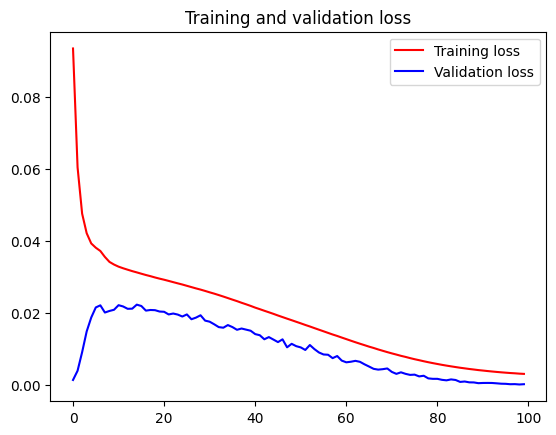

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
# Now you can make predictions
train_predict = best_model.predict(X_train)
test_predict = best_model.predict(X_test)
train_predict.shape, test_predict.shape

13/13 [==============================] - 0s 3ms/step


((587, 1), (387, 1))

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

ACCURACY OF THE MODEL

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  18.996343922183243
Train data MSE:  360.8610824098683
Train data MAE:  11.178218753541078
-------------------------------------------------------------------------------------
Test data RMSE:  5.458813566633779
Test data MSE:  29.798645555265
Test data MAE:  4.4284072013579765


VISUALIZATION OF PRICE PREDICTIONS AND PRICE COMPARISONS

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(close2df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(close2df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close2df)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1006, 1)
Test predicted data:  (1006, 1)


In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = best_model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = best_model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(close2df[len(close2df)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
lstmdf=close2df.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
import joblib
import pickle

# saving the scaler object using joblib for later use in ensemble models
joblib.dump(scaler, '/content/drive/My Drive/Colab Notebooks/ltc_scaler.pkl')

# Save the model
best_model.save('/content/drive/My Drive/Colab Notebooks/ltc_best_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.

